# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [6]:
#Verifica as colunas
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [9]:
idade_media = sinasc_raw.groupby('munResNome')[['IDADEMAE','IDADEPAI']].mean()
idade_media

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


Text(0.5, 1.0, 'Gráfico Idade Média de Acordo com os Municipios')

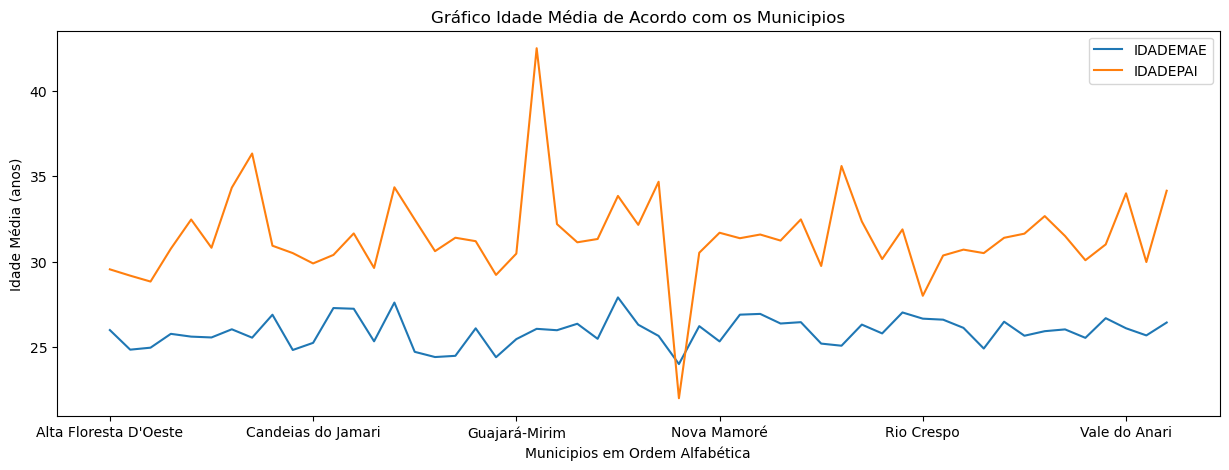

In [10]:
idade_plot = idade_media.plot(figsize = [15,5])
idade_plot.set_ylabel('Idade Média (anos)')
idade_plot.set_xlabel('Municipios em Ordem Alfabética')
idade_plot.set_title('Gráfico Idade Média de Acordo com os Municipios')

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [102]:
PARABENS = sinasc_raw[sinasc_raw['DTNASC'] == '2019-09-24']
peso_medio = PARABENS.groupby(['DTNASC','ESCMAE'])['PESO'].mean().to_frame().sort_values(by='PESO')
peso_medio

PESO
DTNASC     ESCMAE                      
2019-09-24 1 a 3 anos       3101.666667
           4 a 7 anos       3149.411765
           12 anos ou mais  3316.764706
           8 a 11 anos      3330.634146

Text(0.5, 1.0, 'Gráfico Peso Médio Para a Data 24/09 de Acordo com Escolaridade da Mãe')

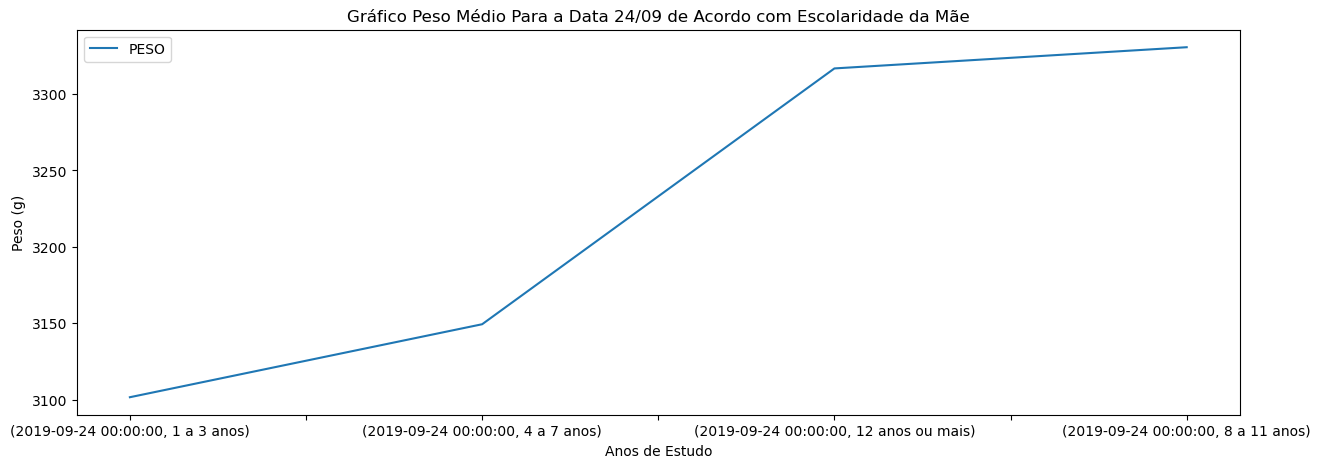

In [104]:
plot_peso = peso_medio.plot(figsize = [15,5])
plot_peso.set_ylabel('Peso (g)')
plot_peso.set_xlabel('Anos de Estudo')
plot_peso.set_title('Gráfico Peso Médio Para a Data 24/09 de Acordo com Escolaridade da Mãe')

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [15]:
sinasc_raw.groupby('munResNome')['CONTADOR'].count().sort_values().head()

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: CONTADOR, dtype: int64

In [16]:
sinasc_raw.loc[sinasc_raw['munResNome'] == 'Castanheiras'].groupby('munResNome')[
    ['IDADEMAE','IDADEPAI']].agg([('Média','mean'),('Mínimo','min'),('Máximo','max')]).round(2)

IDADEMAE               IDADEPAI              
                Média Mínimo Máximo    Média Mínimo Máximo
munResNome                                                
Castanheiras    27.28     17     39    30.39   17.0   43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [18]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['DTNASC']

0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [19]:
sinasc_raw_march = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

sinasc_raw_march['DTNASC'].nunique()

31

In [20]:
sinasc_raw_march.groupby('munResNome')['CONTADOR'].count().sort_values(ascending=False).head()

munResNome
Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: CONTADOR, dtype: int64

In [21]:
sinasc_raw.loc[sinasc_raw['munResNome'] == 'Porto Velho'].groupby('munResNome')[
    ['IDADEMAE','IDADEPAI']].agg([('Média','mean'),('Mínimo','min'),('Máximo','max')]).round(2)

IDADEMAE               IDADEPAI              
               Média Mínimo Máximo    Média Mínimo Máximo
munResNome                                               
Porto Velho    26.31     12     47    32.35   16.0   65.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [24]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [25]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [26]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Analise dados relevantes:

Text(0.5, 1.0, 'Gráfico Peso Médio de Acordo com Escolaridade da Mãe')

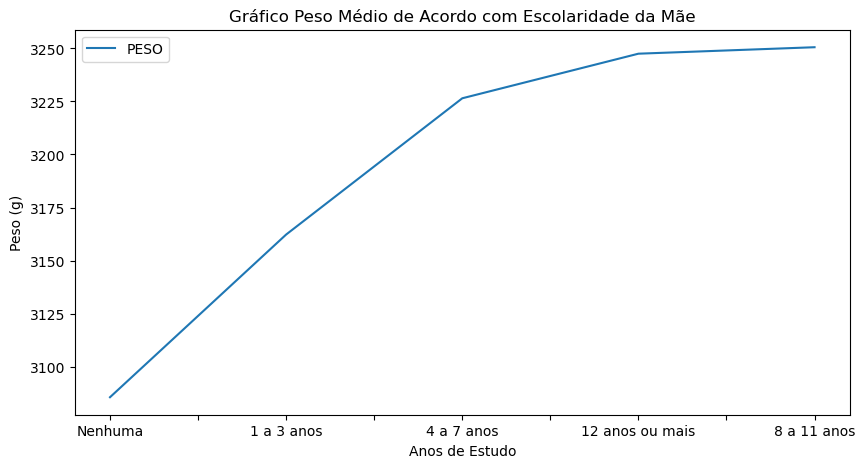

In [122]:
peso_medio_escmae = sinasc_raw.groupby(['ESCMAE'])['PESO'].mean().to_frame().sort_values(by='PESO').plot(figsize=[10,5])
peso_medio_escmae.set_ylabel('Peso (g)')
peso_medio_escmae.set_xlabel('Anos de Estudo')
peso_medio_escmae.set_title('Gráfico Peso Médio de Acordo com Escolaridade da Mãe')

Text(0.5, 1.0, 'Gráfico APGAR1 Médio de Acordo com a Raça do RN')

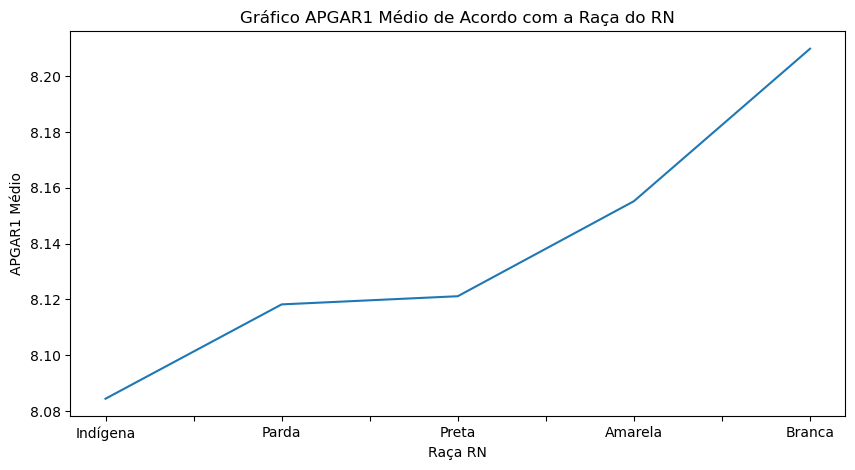

In [126]:
raca_apgar1 = sinasc_raw.groupby('RACACOR')['APGAR1'].mean().sort_values().plot(figsize=[10,5])
raca_apgar1.set_ylabel('APGAR1 Médio')
raca_apgar1.set_xlabel('Raça RN')
raca_apgar1.set_title('Gráfico APGAR1 Médio de Acordo com a Raça/Cor do RN')

Text(0.5, 1.0, 'Gráfico APGAR5 Médio de Acordo com a Raça do RN')

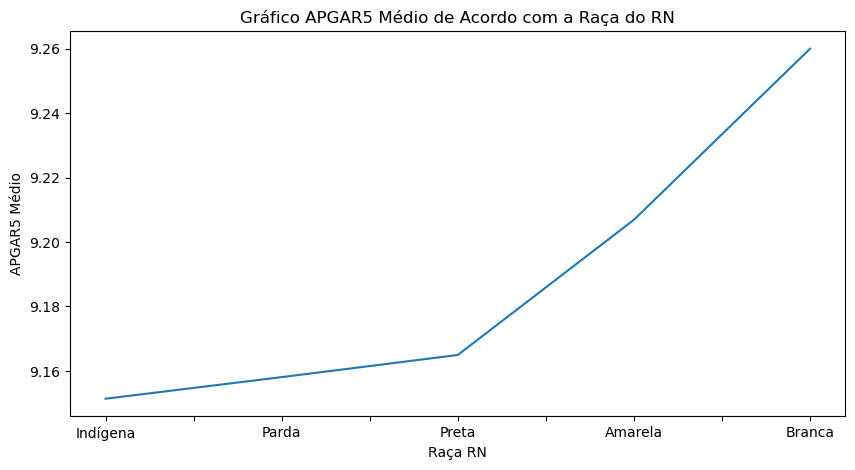

In [124]:
raca_apgar5 = sinasc_raw.groupby('RACACOR')['APGAR5'].mean().sort_values().plot(figsize=[10,5])
raca_apgar5.set_ylabel('APGAR5 Médio')
raca_apgar5.set_xlabel('Raça RN')
raca_apgar5.set_title('Gráfico APGAR5 Médio de Acordo com a Raça/Cor do RN')

Text(0.5, 1.0, 'Gráfico APGAR5 Médio de Acordo com a Raça/Cor da Mãe')

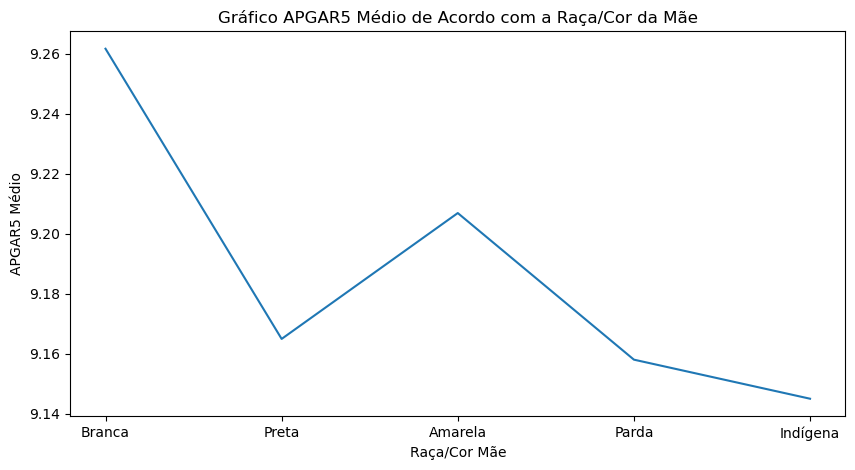

In [130]:
raca_mae_apgar5 = sinasc_raw.groupby('RACACORMAE')['APGAR5'].mean().plot(figsize=[10,5])
ticks = raca_mae_apgar5.set_xticks([1, 2, 3, 4, 5])
labels = raca_mae_apgar5.set_xticklabels(['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena'])
raca_mae_apgar5.set_ylabel('APGAR5 Médio')
raca_mae_apgar5.set_xlabel('Raça/Cor Mãe')
raca_mae_apgar5.set_title('Gráfico APGAR5 Médio de Acordo com a Raça/Cor da Mãe')

Text(0.5, 1.0, 'Gráfico APGAR1 Médio de Acordo com a Raça/Cor da Mãe')

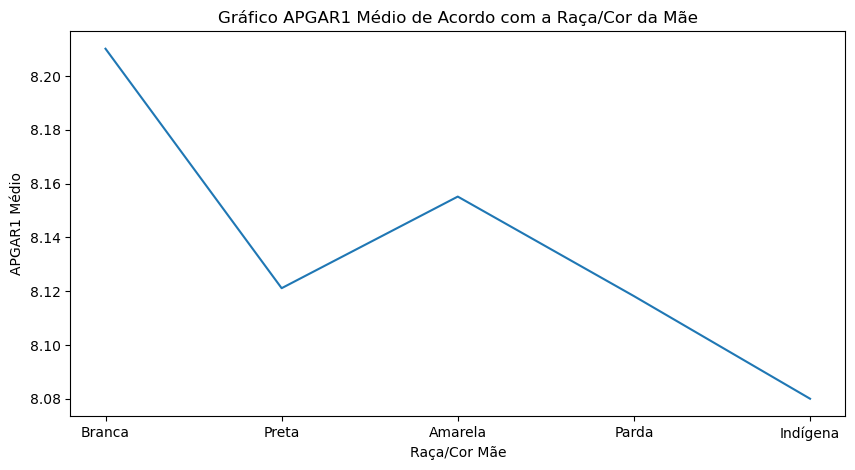

In [132]:
raca_mae_apgar1 = sinasc_raw.groupby('RACACORMAE')['APGAR1'].mean().plot(figsize=[10,5])
ticks = raca_mae_apgar1.set_xticks([1, 2, 3, 4, 5])
labels = raca_mae_apgar1.set_xticklabels(['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena'])
raca_mae_apgar1.set_ylabel('APGAR1 Médio')
raca_mae_apgar1.set_xlabel('Raça/Cor Mãe')
raca_mae_apgar1.set_title('Gráfico APGAR1 Médio de Acordo com a Raça/Cor da Mãe')

De acordo com os gráfico construídos acima e análises feitas préviamente, nota-se uma relação entre os anos de estudos da mãe e o peso de nascimento de seu filho, ficando também exposta a relação entre o APGAR1 e APGAR5 e as raças tanto do nascido quanto da mãe. Percebe-se que aquelas mães que possuem menos anos de estudo tendem a parir bebês com menor peso, também que as classificações de APGAR1 e APGAR5 são as menores entre as mãe indígenas seguidas pelas pardas e pretas. 